# NSC HW2

Kai Malcolm <br>
NSC 3270 <br>
Due 9/14/21 <br>

## Background:
1. General Vectorized Format:
p = (1/np.sqrt(2\*np.pi\*(s\*\*2))) * np.exp(-((x-m)\*\*2)/(2\*(s\*\*2)))


In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Part a) Logistic/Sigmoidal Function

In [2]:
# Reference: alpha(n) = 1 / (1 + exp(-n))

# One of the functions should use a for loop to fill in values of a(n). 
def alpha_for(n, w=1, b=0):
    # Requires the full w vector
    if w is int or w==1:
        w = [1]*len(n)
        
    res = [0]*len(n)
    for idx, val in enumerate(n):
        res[idx] = w[idx] * (1 / (1 + np.exp(-val + b)))
    return res


# The other function should use “vectorized” operations (without a for loop) to fill in values of a(n).
def alpha_vec(n, w=1, b=0):
    return w * (1 / (1 + np.exp((-1)*np.array(n+b))))

## Part b) Basic Relu Function

In [33]:
# One of the functions should use a for loop to fill in values of a(n). 
def relu_for(n, w=1, b=0):
    # Requires the full w vector
    if w is int or w==1:
        w = [1]*len(n)
        
    res = [0]*len(n)
    for idx, val in enumerate(n):
        res[idx] = w[idx]*(val)-b if val > b else 0
    return res


# The other function should use “vectorized” operations (without a for loop) to fill in values of a(n).
def relu_vec(n, w=1, b=0):
    return list(w*np.maximum(n-b, 0))

## Part c) Plotting

In [34]:
def plot_me(n,func,my_label,my_title="Descriptive Title",legend_loc="lower right"):
    # Initialise the figure and axes.
    fig, ax = plt.subplots(1, figsize=(8, 6))

    # Draw all the lines in the same plot, assigning a label for each one
    ax.plot(n, func(n), color="red", label=my_label)

    # Labels
    plt.title(my_title)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.legend(loc=legend_loc, frameon=False)

    plt.show()

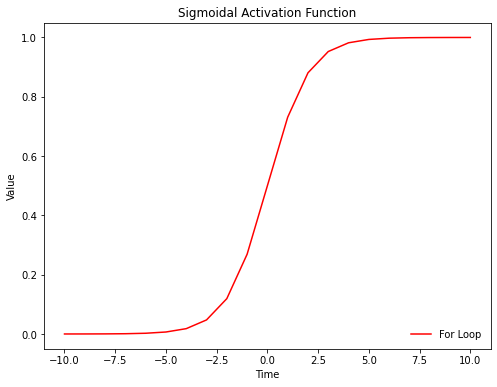

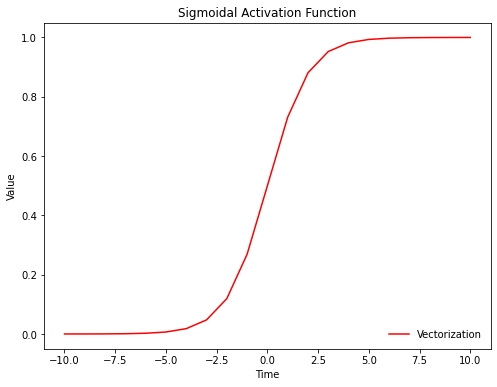

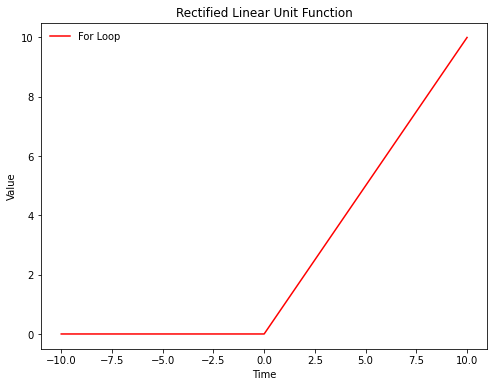

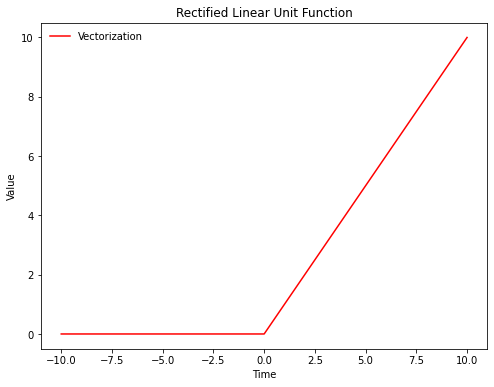

In [36]:
# Define an acceptable range to capture the activity
n = np.arange(-10,11)

# Now plot all the graphs, using the functions from a) and b)
plot_me(n, alpha_for, "For Loop", "Sigmoidal Activation Function")
plot_me(n, alpha_vec, "Vectorization", "Sigmoidal Activation Function")
plot_me(n, relu_for, "For Loop", "Rectified Linear Unit Function", legend_loc="upper left")
plot_me(n, relu_vec, "Vectorization", "Rectified Linear Unit Function", legend_loc="upper left")

## Part d) _n = wx + b_

In [37]:
def vary_eqns(x, func, ind_var, w=1, b=0, legend_loc='upper left'):
    """Gives the user the ability to specify either/both a weighting matrix and a bias when using the activation functions"""
    
    if w is int and w==1:
        w = [1]*len(x)
    
    # Initialise the figure and axes.
    fig, ax = plt.subplots(1, figsize=(8, 6))
    # Draw all the lines in the same plot, assigning a label for each one
    color_arr = ['red', 'green', 'blue', 'pink', 'yellow']
    
    # Either have to walk through b vector or through w vector:
    if ind_var=="w":
        for idx in range(len(w)):
            w_temp = w[idx]
            n = w_temp*x + b
            my_label = f"w = {w_temp[0]}"
            ax.plot(n, func(n, w=w_temp), color=color_arr[idx], label=my_label)
    elif ind_var=="b":
        for idx in range(len(b)):
            b_temp = b[idx]
            n = w*x + b_temp
            my_label = f"b = {b_temp}"
            ax.plot(n, func(n, b=b_temp), color=color_arr[idx], label=my_label)
    else:
        print("Unrecognized indepedent variable")
        return
    
    # Labels
    if ind_var=="w":
        my_title = "Variation of Weighting Matrices Using " + str(func.__name__)
    elif ind_var=="b":
        my_title = "Variation of Biases Using " + str(func.__name__)
    plt.title(my_title)
    # No units have been given.  In neuro-applications, "Time" is presumably miliseconds, and "Value" is presumably voltage
    # However, since activation functions still have meaning outside of neuroscience, the labels have been kept general
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.legend(loc=legend_loc, frameon=False)
    plt.show()

In [38]:
# Reset variables / set up variables for implemented examples
try:
    # This is strictly necessary but we re-use n later as a different variable so just making sure
    del n
except:
    print("n has already been cleared")
    
x = np.arange(-10,11)  # Define an acceptable range

w0 = [0.5]*len(x)
w1 = [1]*len(x)
w2 = [2]*len(x)

w = [w0, w1, w2]  # E.g. test at least 3 weighting vectors
b = [-1, 0, 1, 2, 3]  # #E.g. test at least 3 biases

## Varying the weighting matrices
- Note that weighting matrices "shrink" or "expand" the curves, thus different weighting matrices lead to different sized curves.  This is an intended result.

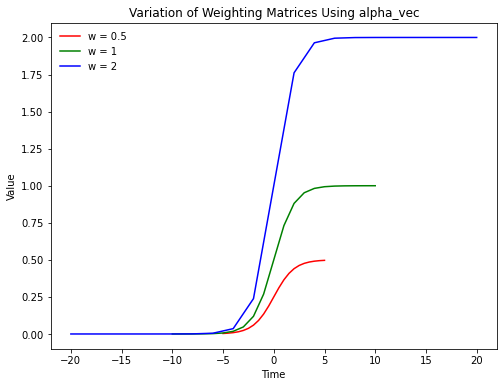

In [39]:
# Sigmoidal Function (vectorized version)
vary_eqns(x, alpha_vec, "w", w=w)

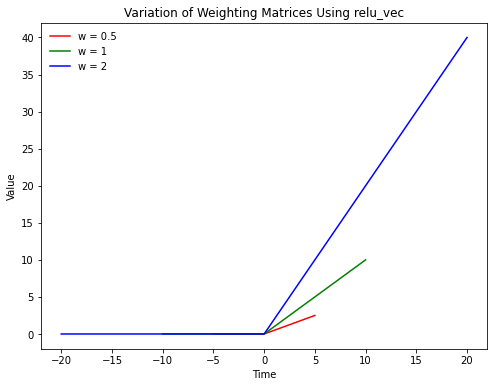

In [40]:
# Relu Function (vectorized version)
vary_eqns(x, relu_vec, "w", w=w)

## Varying the bias
- Changing the bias shift the curves in time, namely about what value they are centered about

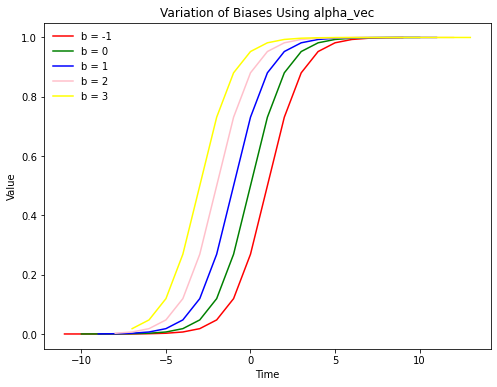

In [41]:
w = [1] * len(x)  # No weighting applied

# Sigmoidal Function (vectorized version)
vary_eqns(x, alpha_vec, "b", w=w, b=b)

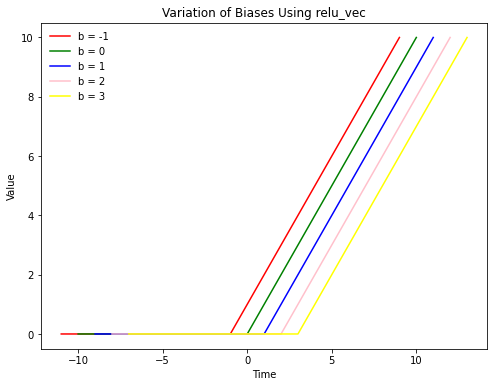

In [42]:
# Relu Function (vectorized version)
vary_eqns(x, relu_vec, "b", w=w, b=b)